# Evaluation Project 8 - Space Server Dataset

Objective - To develop an ML model to predict class of celestial objects amoung three categories based on photometric & spectrial data captured by SSDS telescope

Approach -  Since the target variable i.e class of celestial  is categorical in nature hence a classification model will be a suitable approach 

# Importing datasets

In [117]:
ssd = pd.read_csv('Skyserver.csv')

<IPython.core.display.Javascript object>

# Loading Dataset

In [118]:
ssd.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

Feature descriptions are as below:

1. PhotoObj/objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
RA (Right ascension)is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.


u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.


run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.

View "SpecObj"/specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.


Ref - https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey
http://www.sdss3.org


# Performing EDA & Preparing Data

In [119]:
ssd.shape # Checking dataset shape

(10000, 18)

In [120]:
ssd.info() # Checking null values & data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [121]:
ssd.columns # check column names

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

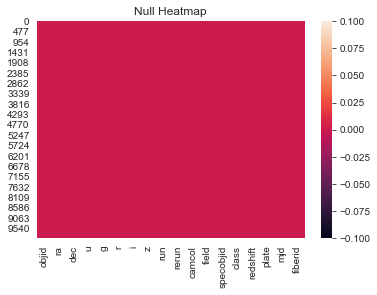

In [122]:
sns.heatmap(ssd.isnull()) # Reconfirming null values
plt.title('Null Heatmap')
plt.show()

In [123]:
ssd.isin([np.nan, np.inf, -np.inf]).count() # checking nan & infinite values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

objid        10000
ra           10000
dec          10000
u            10000
g            10000
r            10000
i            10000
z            10000
run          10000
rerun        10000
camcol       10000
field        10000
specobjid    10000
class        10000
redshift     10000
plate        10000
mjd          10000
fiberid      10000
dtype: int64

In [124]:
ssd.nunique() # checking for unique values in dataset

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [125]:
ssd.describe() # checking stast summary

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [126]:
ssd.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

# Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

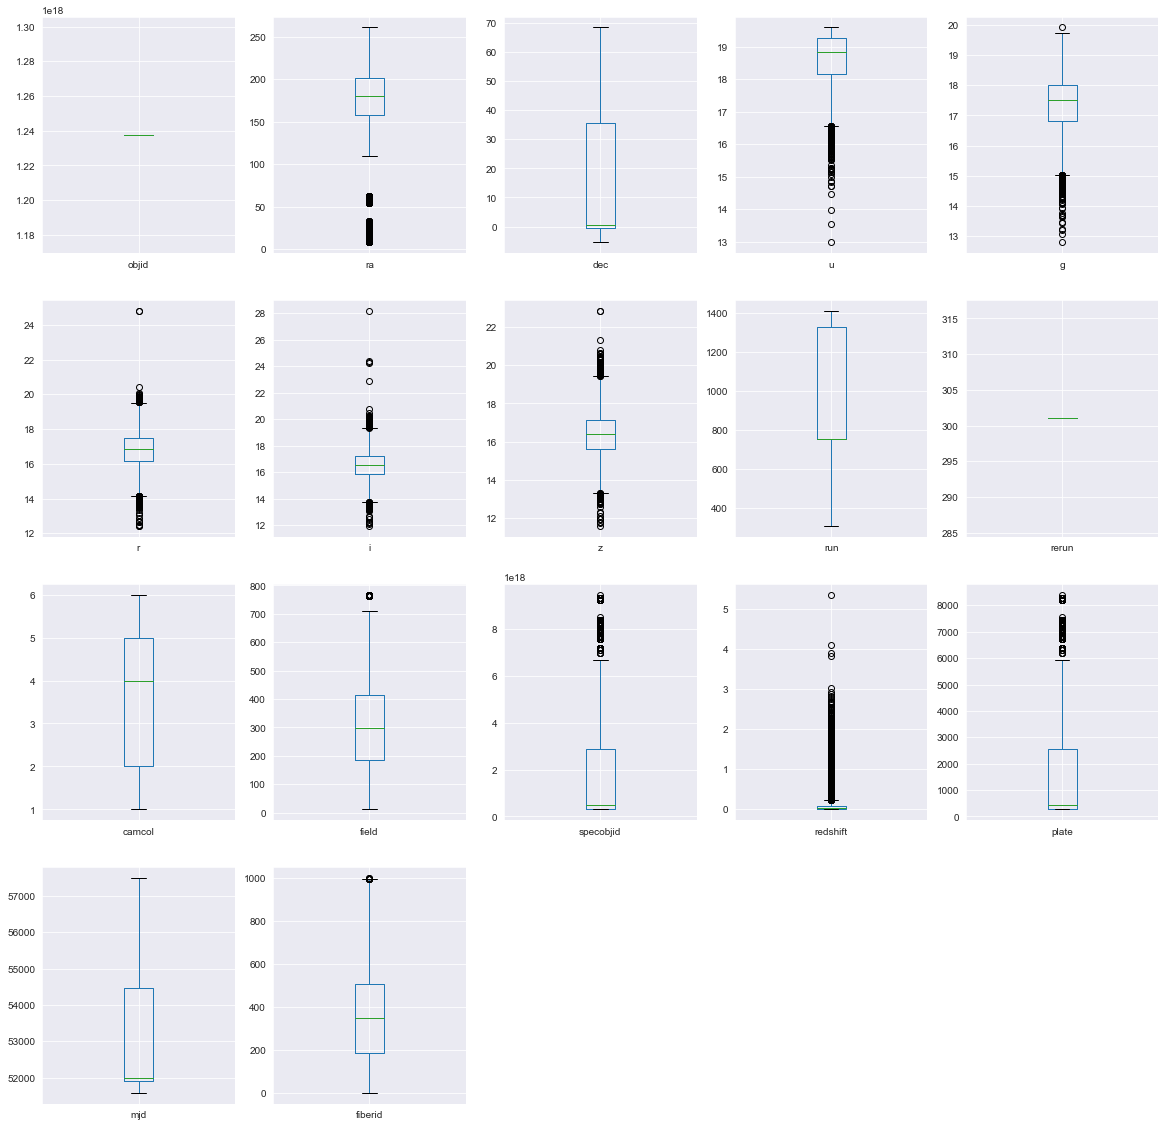

In [131]:
import warnings
warnings.filterwarnings('ignore')
# To check outliers
ssd.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,20))
sns.set_style('darkgrid')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

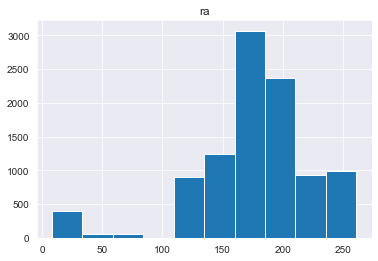

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

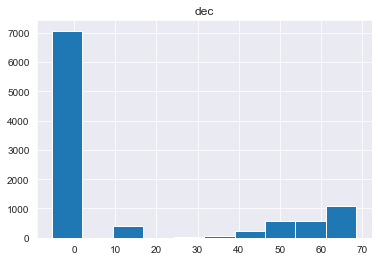

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

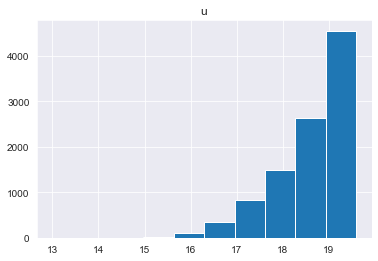

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

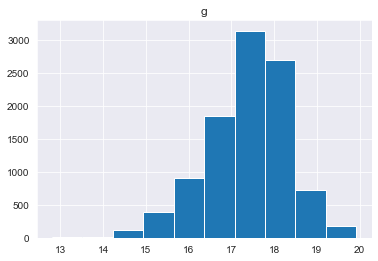

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

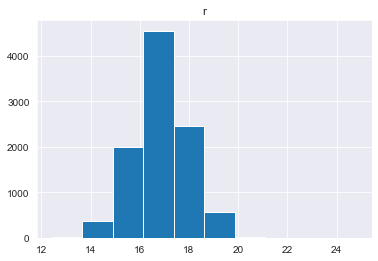

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

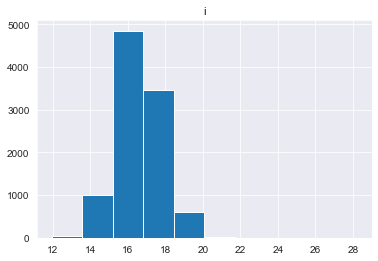

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

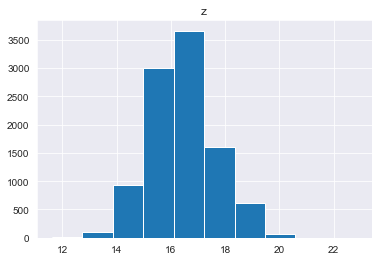

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

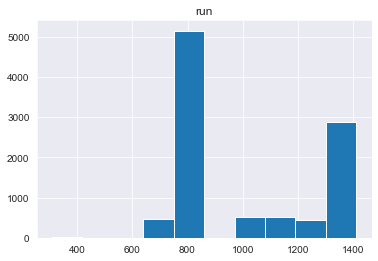

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

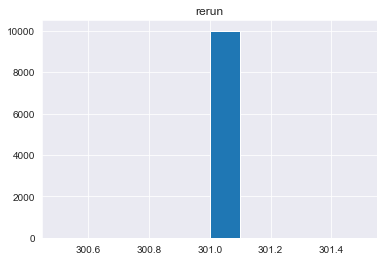

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

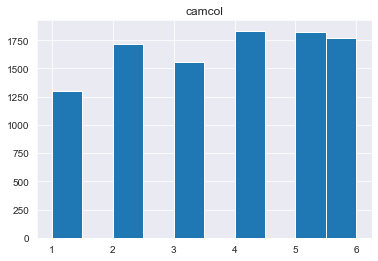

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

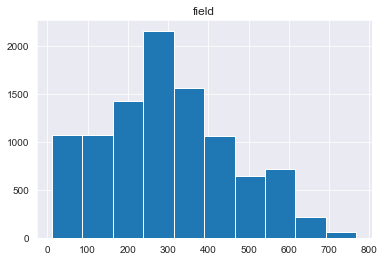

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

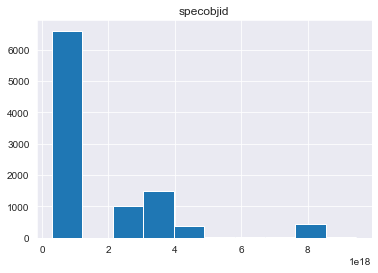

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

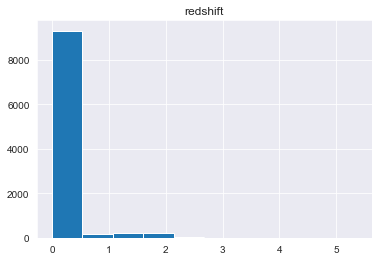

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

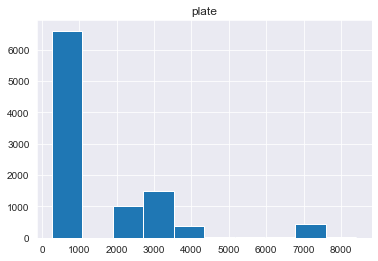

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

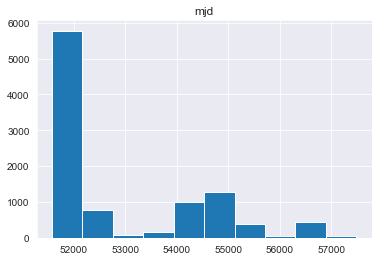

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

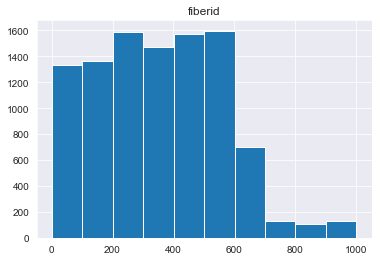

In [132]:
list = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol','field', 'specobjid','redshift', 'plate', 'mjd', 'fiberid']
for i in list:
    plt.hist(ssd[i])
    plt.title(i)
    sns.set_style('darkgrid')
    plt.show()

Bivariate Analysis

0    4998
2    4152
1     850
Name: class, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

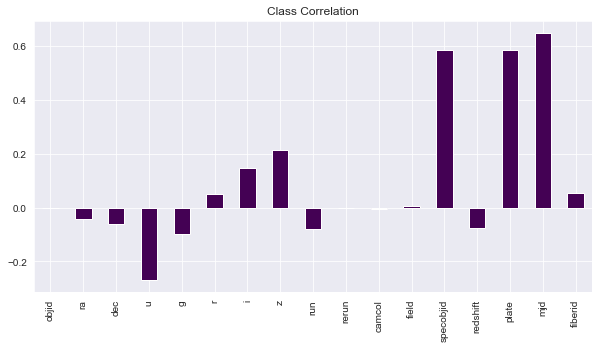

In [133]:
#Checking coorelation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ssd['class'] = le.fit_transform(ssd['class'].astype(str))
print(ssd['class'].value_counts())
plt.figure(figsize = (10,5))
ssd.drop('class',axis=1).corrwith(ssd['class']).plot(kind='bar', cmap ='viridis')
plt.title('Class Correlation')
sns.set_style('darkgrid')
plt.show()

In [134]:
ssd.drop(['objid','rerun','camcol','field','fiberid','ra'],axis =1, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

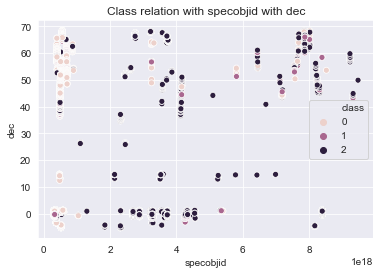

In [135]:
sns.scatterplot(ssd['specobjid'],ssd['dec'], hue = ssd['class'])
plt.title('Class relation with specobjid with dec')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

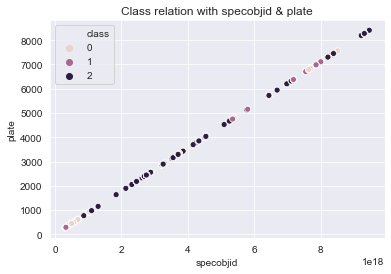

In [136]:
sns.scatterplot(ssd['specobjid'],ssd['plate'], hue = ssd['class'])
plt.title('Class relation with specobjid & plate')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

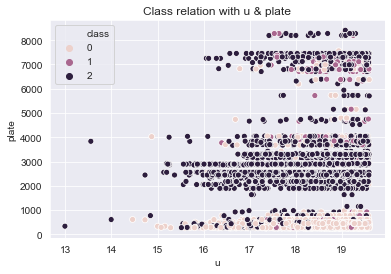

In [137]:
sns.scatterplot(ssd['u'],ssd['plate'], hue = ssd['class'])
plt.title('Class relation with u & plate')
plt.show()

In [138]:
# To calculate Z score
from scipy.stats import zscore
z = np.abs(zscore(ssd))
threshold = 3
ssd= ssd[(z<3).all(axis=1)]
print(ssd.shape)

<IPython.core.display.Javascript object>

(9084, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

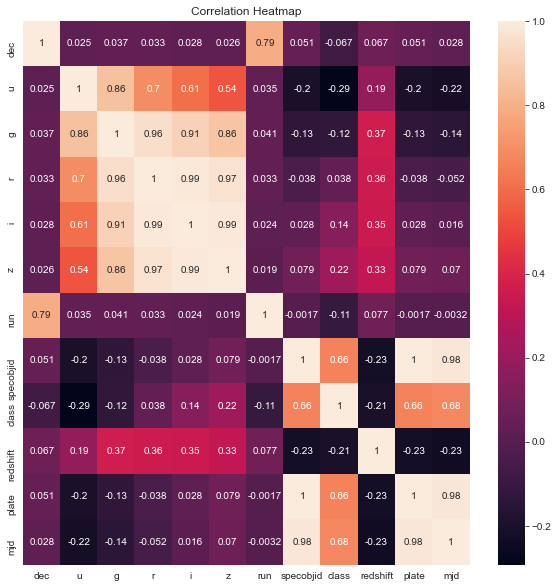

In [139]:
plt.figure(figsize = (10,10))
sns.heatmap(ssd.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

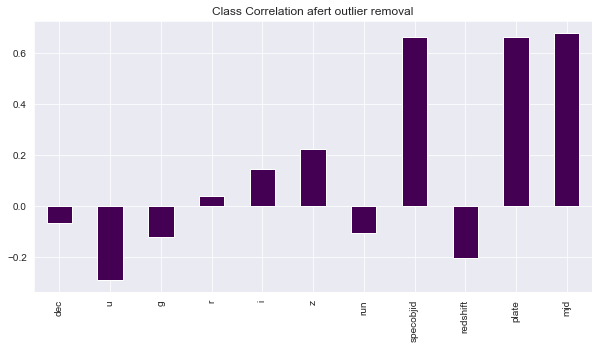

In [140]:
# Rechecking correlation after droping outliers & non required columns
plt.figure(figsize = (10,5))
ssd.drop('class',axis=1).corrwith(ssd['class']).plot(kind='bar', cmap ='viridis')
plt.title('Class Correlation afert outlier removal')
sns.set_style('darkgrid')
plt.show()

# Building the model

In [141]:
# importing required libraries
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [142]:
x = ssd.drop(['class'], axis=1)
y = pd.DataFrame(ssd['class'])

<IPython.core.display.Javascript object>

In [143]:
print(x.shape)
print(y.shape)

(9084, 11)
(9084, 1)


In [144]:
x = power_transform(x,method = 'yeo-johnson')

In [145]:
# identifying Best Random state
import warnings
warnings.filterwarnings('ignore')
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    svc =SVC()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 99.2496248124062% best random state is 75


In [146]:
list=[KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(), 
      DecisionTreeClassifier(), XGBClassifier(), GradientBoostingClassifier(),GaussianNB(),SVC()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 75)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between accuracy score & cv score = {round((accuracy_score(y_test,pred)*100)-(cv_score*100))}\n')
    print('_______________________________________________________________________________________________')

For algorithm KNeighborsClassifier() Accuracy Score is 98.54927463731866
For algorithm KNeighborsClassifier() cross validation score is 97.98536902148363
Difference between accuracy score & cv score = 1.0

_______________________________________________________________________________________________
For algorithm RandomForestClassifier() Accuracy Score is 99.39969984992496
For algorithm RandomForestClassifier() cross validation score is 98.9211410127797
Difference between accuracy score & cv score = 0.0

_______________________________________________________________________________________________
For algorithm AdaBoostClassifier() Accuracy Score is 95.94797398699349
For algorithm AdaBoostClassifier() cross validation score is 80.16631288679528
Difference between accuracy score & cv score = 16.0

_______________________________________________________________________________________________
For algorithm DecisionTreeClassifier() Accuracy Score is 99.1495747873937
For algorithm Decisi

In [147]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
rfc1 = GradientBoostingClassifier()
parameters = {'max_features' : ['auto', 'sqrt', 'log2']}
xgb_grid = GridSearchCV(rfc1,parameters)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9884262526464361
{'max_features': 'auto'}


In [148]:
# Building the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22, random_state = 75)
rfc = GradientBoostingClassifier(max_features= 'auto')
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(f'cv_score = {round(cross_val_score(rfc,x,y,cv= 10).mean()*100)}%')
print('_______________________________________________________________________________________________')
print(f'accuracy score = {round(accuracy_score(y_test,predrfc)*100)}%')
print('_______________________________________________________________________________________________')
print(f'confusion matrix \n {confusion_matrix(y_test,predrfc)}')
print('_______________________________________________________________________________________________')
print(f'Classification report \n {classification_report(y_test,predrfc)}')

cv_score = 99.0%
_______________________________________________________________________________________________
accuracy score = 99.0%
_______________________________________________________________________________________________
confusion matrix 
 [[1087    2    0]
 [   8   79    0]
 [   1    0  822]]
_______________________________________________________________________________________________
Classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1089
           1       0.98      0.91      0.94        87
           2       1.00      1.00      1.00       823

    accuracy                           0.99      1999
   macro avg       0.99      0.97      0.98      1999
weighted avg       0.99      0.99      0.99      1999



# Saving the Best Model

In [149]:
import joblib
joblib.dump(rfc,'Celestial body prediction.obj')

['Celestial body prediction.obj']

In [150]:
cel_pred=joblib.load('Celestial body prediction.obj')

# Testing the Model

In [151]:
y_pred = cel_pred.predict(x)

In [152]:
confusion_matrix(y,y_pred)

array([[4937,    4,    0],
       [  18,  412,    0],
       [   1,    0, 3712]], dtype=int64)

In [153]:
accuracy_score(y,y_pred)

0.9974680757375606

In [154]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4941
           1       0.99      0.96      0.97       430
           2       1.00      1.00      1.00      3713

    accuracy                           1.00      9084
   macro avg       1.00      0.99      0.99      9084
weighted avg       1.00      1.00      1.00      9084



<IPython.core.display.Javascript object>

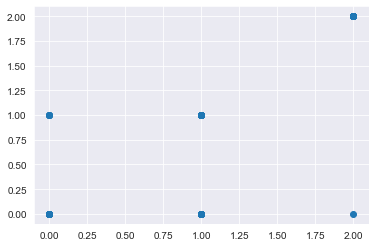

In [155]:
plt.scatter(y,y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

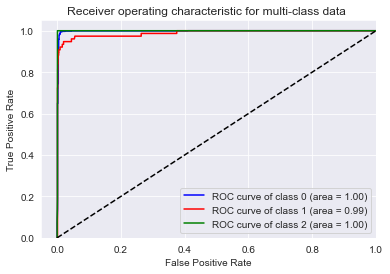

In [157]:
# Drawing ROC Curve with Label binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=80)

classifier = OneVsRestClassifier(GradientBoostingClassifier(max_features= 'auto'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data ')
plt.legend(loc="lower right")
plt.show()

# Conclusion - The model trained with XGBClassifier can predict the celestial object class with an accuracy of 99% & probability of :
100% for Galaxy(0)

99% for QSO (1)

100% for star (2)